In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Clean the bureau csv

In [3]:
file_name = "Customer_Segment_For_Bureau_Data.csv"
df = pd.read_csv(file_name)

df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462.0,Closed,currency 1,-497.0,0.0,-153.0,-153.0,NaN,0.0,91323.0,0.0,NaN,0.0,Consumer credit,-131.0,NaN
1,215354,5714463.0,Active,currency 1,-208.0,0.0,1075.0,NaN,NaN,0.0,225000.0,171342.0,NaN,0.0,Credit card,-20.0,NaN
2,215354,5714464.0,Active,currency 1,-203.0,0.0,528.0,NaN,NaN,0.0,464323.5,NaN,NaN,0.0,Consumer credit,-16.0,NaN
3,215354,5714465.0,Active,currency 1,-203.0,0.0,NaN,NaN,NaN,0.0,90000.0,NaN,NaN,0.0,Credit card,-16.0,NaN
4,215354,5714466.0,Active,currency 1,-629.0,0.0,1197.0,NaN,77674.5,0.0,2700000.0,NaN,NaN,0.0,Consumer credit,-21.0,NaN


In [9]:
df.drop(columns=['CREDIT_TYPE', "SK_ID_BUREAU", 'CREDIT_ACTIVE', 'CREDIT_CURRENCY'], inplace=True)

KeyError: "['CREDIT_TYPE', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY'] not found in axis"

In [460]:
aggregation_rules = {
    'DAYS_CREDIT': 'mean',
    'CREDIT_DAY_OVERDUE': 'max',
    'DAYS_CREDIT_ENDDATE': 'max',
    'DAYS_ENDDATE_FACT': 'mean',
    'AMT_CREDIT_MAX_OVERDUE': 'max',
    'CNT_CREDIT_PROLONG': 'sum',
    'AMT_CREDIT_SUM': 'mean',
    'AMT_CREDIT_SUM_DEBT': 'sum',
    'AMT_CREDIT_SUM_LIMIT': 'max',
    'AMT_CREDIT_SUM_OVERDUE': 'sum',
    'DAYS_CREDIT_UPDATE': 'max',
    'AMT_ANNUITY': 'mean'
}


aggregated_df = df.groupby('SK_ID_CURR').agg(aggregation_rules).reset_index()
aggregated_df.head()

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100003,-1400.750000,0.0,1216.0,-1097.333333,0.000,0.0,254350.125000,0.0,810000.0,0.0,-43.0,NaN
1,100041,-1292.538462,0.0,117.0,-1066.000000,5830.965,0.0,63254.243077,0.0,0.0,0.0,-34.0,NaN
2,100088,-1408.200000,0.0,1222.0,-871.333333,NaN,0.0,355500.000000,403969.5,0.0,0.0,-28.0,NaN
3,100120,-515.000000,55.0,486.0,NaN,NaN,0.0,184455.000000,108837.0,0.0,166.5,-72.0,NaN
4,100140,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN


In [461]:
aggregated_df.count()

SK_ID_CURR                8030
DAYS_CREDIT               7196
CREDIT_DAY_OVERDUE        7196
DAYS_CREDIT_ENDDATE       7130
DAYS_ENDDATE_FACT         6398
AMT_CREDIT_MAX_OVERDUE    5086
CNT_CREDIT_PROLONG        8030
AMT_CREDIT_SUM            7196
AMT_CREDIT_SUM_DEBT       8030
AMT_CREDIT_SUM_LIMIT      6655
AMT_CREDIT_SUM_OVERDUE    8030
DAYS_CREDIT_UPDATE        7196
AMT_ANNUITY               2282
dtype: int64

In [462]:
aggregated_df.to_csv('Customer_Segment_For_Bureau_Data_Aggregated.csv', index=False)
print("Data has been written to Customer_Segment_For_Bureau_Data_Aggregated.csv")

Data has been written to Customer_Segment_For_Bureau_Data_Aggregated.csv


In [463]:
application_df = pd.read_csv("Customer_Segment_For_Application_Data.csv")
application_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100041,0,Cash loans,F,N,N,0,112500.0,450000.0,44509.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100088,0,Revolving loans,F,N,N,0,112500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
3,100120,0,Cash loans,F,N,N,0,135000.0,781920.0,28215.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100140,0,Revolving loans,F,N,N,0,157500.0,675000.0,33750.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8025,456145,0,Cash loans,F,N,N,0,162000.0,900000.0,29034.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8026,456151,0,Cash loans,F,N,N,0,90000.0,369720.0,22747.5,...,0,0,0,0,0.0,0.0,0.0,0.0,4.0,8.0
8027,456239,0,Cash loans,M,Y,N,0,180000.0,808650.0,23773.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
8028,456240,0,Revolving loans,F,N,N,0,360000.0,337500.0,16875.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [464]:
application_df = pd.read_csv("Customer_Segment_For_Application_Data.csv")

merged_df = aggregated_df.merge(application_df[['SK_ID_CURR', 'TARGET']], how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')

# Drop the redundant ID column
#merged_df.drop(columns='SK_ID_CURR', inplace=True)

# Ensure that the merge was successful
print("Merged DataFrame:")
print(merged_df.head())

Merged DataFrame:
   SK_ID_CURR  DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
0      100003 -1400.750000                 0.0               1216.0   
1      100041 -1292.538462                 0.0                117.0   
2      100088 -1408.200000                 0.0               1222.0   
3      100120  -515.000000                55.0                486.0   
4      100140          NaN                 NaN                  NaN   

   DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  \
0       -1097.333333                   0.000                 0.0   
1       -1066.000000                5830.965                 0.0   
2        -871.333333                     NaN                 0.0   
3                NaN                     NaN                 0.0   
4                NaN                     NaN                 0.0   

   AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
0   254350.125000                  0.0              810000.0   
1    63254.243077 

In [50]:
merged_df.tail()

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,TARGET
8025,456145,-726.000000,0.0,410.0,-621.800000,NaN,0.0,51597.000000,18696.00000,0.00,0.0,-8.0,NaN,0
8026,456151,-1390.666667,0.0,-59.0,-1148.000000,0.0,0.0,49085.400000,0.00000,0.00,0.0,-57.0,5575.5,0
8027,456239,-1529.909091,0.0,10294.0,-1534.166667,0.0,0.0,569301.136364,380952.90000,0.00,0.0,-21.0,NaN,0
8028,456240,-1438.500000,0.0,27317.0,-2464.000000,7992.0,0.0,66199.500000,39872.25000,50127.75,0.0,-14.0,NaN,0
8029,456255,-1089.454545,0.0,27320.0,-968.333333,25578.0,1.0,345629.045455,191864.12625,0.00,0.0,-8.0,1081.5,0


## Testing Bureau Data 

In [51]:
def woe_iv(data : pd.DataFrame, variable_name : str, br : str = 'Bin_Range') -> tuple[float, pd.DataFrame]:
    # data = input dataframe that has already been binned for the predictor variable_name
    # variable_name = predictor variable, not used in this function
    working_data = data.copy()

    # missing values have been assigned NaN when binning with pd.qcut
    # rename this bin as 'Missing' to consider into WOE calculation
    working_data[br] = working_data[br].astype('category')
    miss = 'Missing'
    if miss not in working_data[br].cat.categories:
        working_data[br] = working_data[br].cat.add_categories(miss)
    working_data[br] = working_data[br].fillna(miss)

    variable_data = pd.DataFrame()
    variable_data[br] = working_data[br].cat.categories
    # everything is faster with numpy
    gb = working_data.groupby(br, observed = False)['TARGET']
    c = gb.count().to_numpy()
    variable_data['Count'] = c
    se = gb.sum().to_numpy()
    variable_data['Events'] = se
    ne =  c - se
    variable_data['Non_Events'] = ne
    pe = se / se.sum()
    variable_data['%_of_Events'] = pe
    pne = ne / ne.sum()
    variable_data['%_of_Non_Events'] = pne
    # suppress warning if taking log of zero
    with np.errstate(divide = 'ignore', invalid = 'ignore'):
        woe = np.log(pne) - np.log(pe)
    variable_data['WOE'] = woe
    variable_data['IV'] = (pne - pe) * woe

    IV = variable_data['IV'].sum(skipna = True)
    return IV, variable_data

In [52]:
def woe_iv_plot(data : pd.DataFrame, variable_name : str, br : str = 'Bin_Range'):
    # data = input dataframe that has already been binned for the predictor variable_name
    # variable_name = name of predictor variable that has been binned
    IV, variable_data = woe_iv(data, variable_name, br)
    print(f'IV for {variable_name} with {variable_data.shape[0]} bins = {IV:.4f}')
    fig, ax1 = plt.subplots(figsize = (18, 6))
    woe_col = variable_data['WOE']
    sns.lineplot(data = woe_col.iloc[:-1], marker = 'o', sort = False, ax = ax1)
    plt.xticks(rotation = 45, horizontalalignment = 'right')
    # create the scatter plot to plot the Missing WOE data point, if there is any
    last_point = woe_col.shape[0] - 1
    y = woe_col[last_point]
    if not pd.isna(y):
        sns.scatterplot(x = [last_point], y = [y], color = 'b', s = 30, ax = ax1)
    # plot the bin counts
    ax2 = ax1.twinx()
    sns.barplot(x = variable_data[br] , y = variable_data['Count'], alpha = .5, ax = ax2, color = 'deepskyblue')
    plt.title(f'WOE plot for {variable}')
    plt.show()

In [480]:
variables = ["DAYS_CREDIT", "CREDIT_DAY_OVERDUE", "DAYS_CREDIT_ENDDATE", "DAYS_ENDDATE_FACT", "AMT_CREDIT_MAX_OVERDUE", "CNT_CREDIT_PROLONG", "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_DEBT", "AMT_CREDIT_SUM_LIMIT", "AMT_CREDIT_SUM_OVERDUE", "DAYS_CREDIT_UPDATE", "AMT_ANNUITY"]
#variables = ["DAYS_CREDIT"]
bin_count = 30
br = 'Bin_Range'

res = {}
for i in variables:
  df_data_working = merged_df.copy()
  df_data_working = df_data_working[[i, 'TARGET']]
  df_data_working[br] = pd.qcut(df_data_working[i], q = bin_count, precision = 0, duplicates="drop")

  resIV = woe_iv(df_data_working, i, br)[0].round(4)
  res[i] = resIV

# Print key-value pairs line by line
for key, value in res.items():
    print(f"{key}: {value}")

DAYS_CREDIT: 0.1537
CREDIT_DAY_OVERDUE: 0.0
DAYS_CREDIT_ENDDATE: 0.1521
DAYS_ENDDATE_FACT: 0.1311
AMT_CREDIT_MAX_OVERDUE: 0.0524
CNT_CREDIT_PROLONG: 0.0052
AMT_CREDIT_SUM: 0.1037
AMT_CREDIT_SUM_DEBT: 0.0718
AMT_CREDIT_SUM_LIMIT: 0.0234
AMT_CREDIT_SUM_OVERDUE: 0.0
DAYS_CREDIT_UPDATE: 0.2139
AMT_ANNUITY: 0.1008


In [450]:
merged_df[variable].min()
#merged_df[variable].max()

-220213.4175

IV for AMT_CREDIT_SUM_DEBT with 15 bins = inf


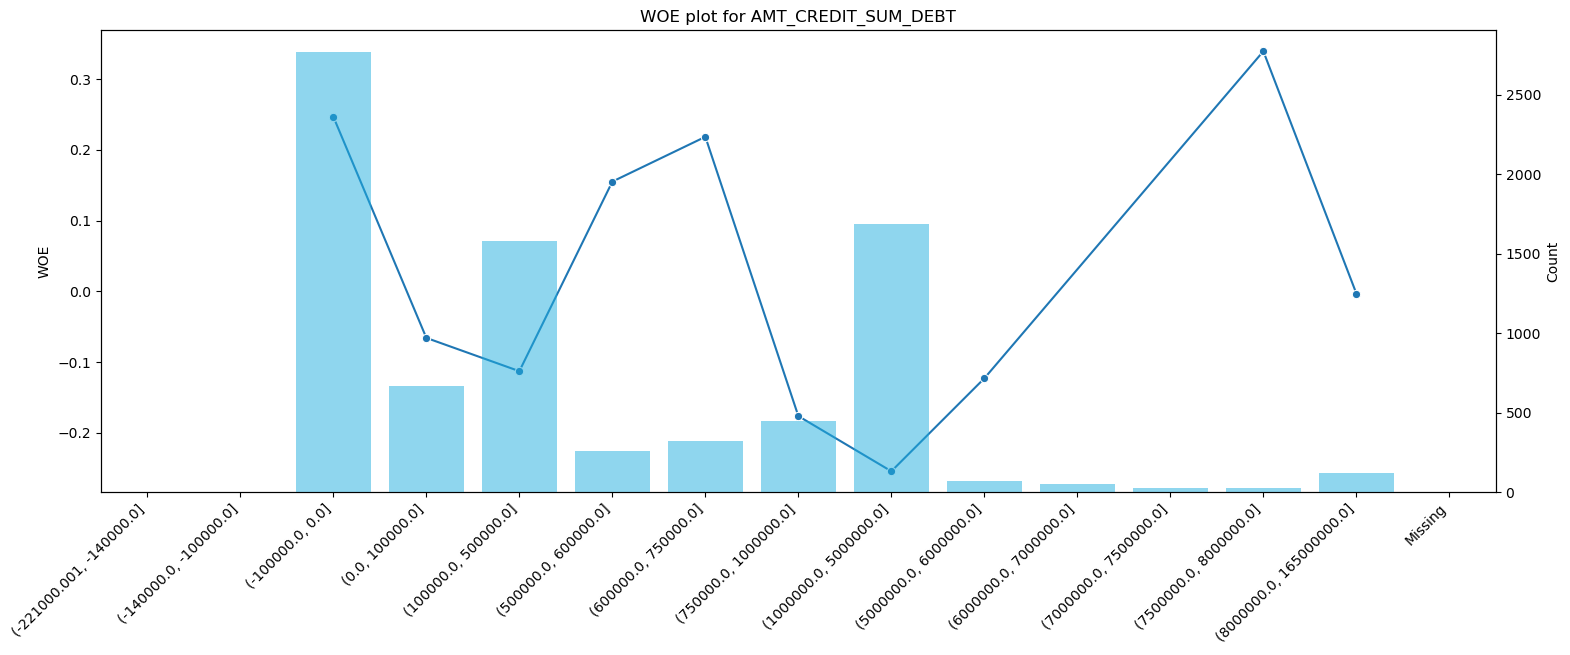

In [477]:
bin_edges = [-221000, -140000, -100000, 0, 100000, 500000, 600000, 750000, 1000000, 5000000, 6000000, 7000000, 7500000, 8000000, 165000000]
variable = 'AMT_CREDIT_SUM_DEBT'      
bin_count = 80
# create groupings based on specified bin edges
df_feature = merged_df.copy()
df_feature['Bin_Range'] = pd.cut(df_feature[variable], bins = bin_edges, include_lowest = True)

#df_feature["Bin_Range"] = pd.qcut(df_feature[variable], q = bin_count, precision = 0, duplicates="drop")
# hmeq_data_working['Bin_Range'].value_counts().sort_index()

#bin_edges = df_feature['Bin_Range'].unique()
#for i in bin_edges:
    #print(i)

woe_iv_plot(df_feature, variable)

In [365]:
bin_edges = sorted([-55.0, -43.0, -36.0, -32.0, -95.0, -334.0, -543.0, -18.0, -21.0, -14.0, -28.0, -8.0, -15.0, -9.0, -7.0, -13.0, -10.0, -5.0, -17.0, -3.0, -815.0, -6.0, -2723.0, -188.0, -23.0, -19.0, -11.0, -43.0, -26.0, -12.0])
bin_edges

[-2723.0,
 -815.0,
 -543.0,
 -334.0,
 -188.0,
 -95.0,
 -55.0,
 -43.0,
 -43.0,
 -36.0,
 -32.0,
 -28.0,
 -26.0,
 -23.0,
 -21.0,
 -19.0,
 -18.0,
 -17.0,
 -15.0,
 -14.0,
 -13.0,
 -12.0,
 -11.0,
 -10.0,
 -9.0,
 -8.0,
 -7.0,
 -6.0,
 -5.0,
 -3.0]

## Results

- DAYS_CREDIT
  - bin_edges = [-3000, -2500, -2000, -1600, -930, -850, -680, -600, -470, -460, -440, -260, -180, -120, -30, 0]
- DAYS_CREDIT_ENDDATE
  - No luck
- DAYS_ENDDATE_FACT
  - Really low iv 
  - bin_edges = [-2800, -2400, -2250, -1800, -1450, -800, -500, -380, -200, -100, -50, 0 ]
- AMT_CREDIT_SUM
  - Cannot fit for monotonicity
- DAYS_CREDIT_UPDATE
  - bin_edges = [-2723.0, -20, -18.0, -15.0, -10.0, -8.0, -7.5, -5,-3.0], iv=0.948
  
